Author: Prabin

### Prerequisites:


1. Knowledge about commonly used functions in Tensorflow.
2. Basic workflow of an ANN model.

### Learning Objectives:

1. Learn how to implement a simple ANN in Tensorflow using the Keras API.
2. Learn about various classification metrics.


Lets look at the TensorFlow implementation of Artificial Neural Networks (ANN).

## TensorFlow:
TensorFlow is an open-source machine learning framework developed by the Google Brain team. It's designed to simplify the process of building and deploying machine learning models, offering a flexible and comprehensive ecosystem for various machine learning tasks, from neural networks to deep learning. TensorFlow offers high-level APIs like Keras, which simplifies model building and training with intuitive, user-friendly interfaces.

Lets build a model using Tensorflow now.

\

### 1. Installing and Importing TensorFlow and necessary Libraries:

In [1]:
!pip install Tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### 2. Downloading dataset and Exploring the data
We start by downloading the Fashion MNIST dataset to perform classification.To download it, we use keras.dataset API.

Here (x_train, y_train) is our **training dataset**. Training Dataset is an actual dataset that we use to train the parameters of the model (weights and biases in the case of Neural Network). The model sees and learns from this data. Further split of train set into validation set and train set is done later in the code.

(x_test,y_test) is our **test dataset**. which is the sample of data used to provide an unbiased evaluation of a final model .Our model only sees the test dataset at the end, it is used as final evaluation of the model


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Here, x_train shape (60000,28,28) means it has 60k examples of image each of size 28*28 and y_train shape (60000,) means it has one label for each 60k training image.

Meanwhile the test set has fewer instances, which is obvious.
(1000/6000)*100 = 16.67 % of the data is test data.

Lets explore the dataset even further

In [5]:
print("The first image, all pixels shown is:\n",x_train[0,:,:])
print("\n")
print("The target label of the first picture is:",y_train[0])

The first image, all pixels shown is:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0

The image shown in numbers format is hard to grasp by humans. But let's naively guess that the picture is a shoe based on the values in the matrix. Lets check by plotting the image.

For plotting the image, we use matplotlib.pyplot.imshow() library.

`matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)`

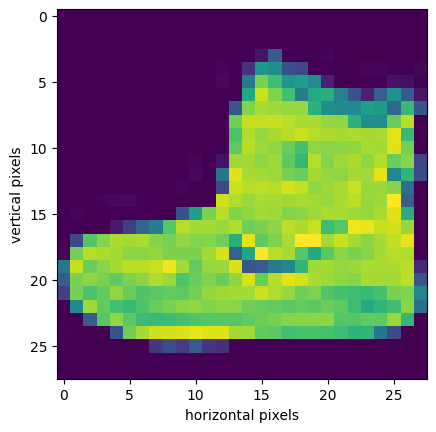

In [6]:
import matplotlib.pyplot as plt
plt.xlabel('horizontal pixels')
plt.ylabel('vertical pixels')
plt.imshow(x_train[0,:,:])     # [image index, vertical pixels, horizontal pixels]

Lets use tenforflow.unique to find out the unique elements in a 1D tensor.

* 'values' tensor contains the unique elements in the dataset.

* 'ydx' tensor contains the indices of the unique elements in the original y_train tensor. The shape of idx is the same as the input tensor y_train

`tf.unique(x,out_idx=tf.dtypes.int32,name=None)`

In [7]:
values, idx = tf.unique(y_train)

In [8]:
print("Unique y labels in the order of dataset:\n",values, sep='')            # 'sep' helps to maintain proper identation

Unique y labels in the order of dataset:
tf.Tensor([9 0 3 2 7 5 1 6 4 8], shape=(10,), dtype=uint8)


In [9]:
print(idx)

tf.Tensor([0 1 1 ... 2 1 5], shape=(60000,), dtype=int32)


#### Histogram:
Lets see the logic behind the histogram first.

We intend to have numbers ranged 1 to 100 in the x axis, and their counts in y axis. Thats like setting number of bins = 100. But lets set the number of bins = 20 and understand whats going on.

* Range = 100-0 = 100
* Binwidth = 100/20 = 5
* Each bin covers (0 to 5), (5 to 10), (10 to 15) and so on.....
* Histogram counts how many data points are in each bin and plot the distribution.

So basically, the original datapoints are categorized into 20 classes, and those classes' distribution is being shown!

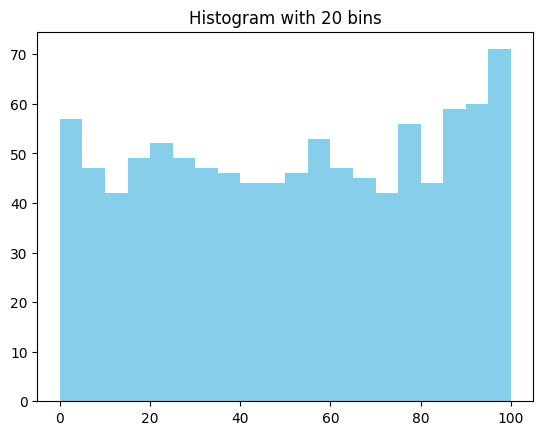

In [10]:
import numpy as np
data = np.random.randint(0, 101, size=1000)  # Random integers from 0 to 100

plt.hist(data, bins=20, color = 'skyblue')
plt.title('Histogram with 20 bins')
plt.show()

Now that we know the logic behind the histogram, lets plot the histogram for our dataset.

(array([6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000.,
        6000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

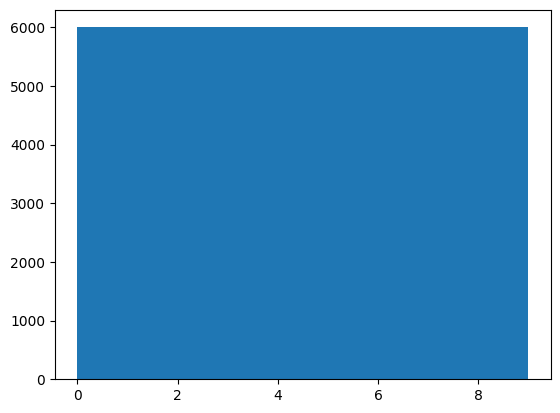

In [11]:
plt.hist(y_train, bins = 10)

For continuous data, each bin can represent a range of values. For discrete data (like class labels), each bin can represent an individual class or a group of classes.

To make the histogram finer, lets increase the number of bins. Upon doing so, there is a higher chance that each bin contains a separate class.

(array([6000.,    0., 6000.,    0., 6000.,    0., 6000.,    0., 6000.,
           0.,    0., 6000.,    0., 6000.,    0., 6000.,    0., 6000.,
           0., 6000.]),
 array([0.  , 0.45, 0.9 , 1.35, 1.8 , 2.25, 2.7 , 3.15, 3.6 , 4.05, 4.5 ,
        4.95, 5.4 , 5.85, 6.3 , 6.75, 7.2 , 7.65, 8.1 , 8.55, 9.  ]),
 <BarContainer object of 20 artists>)

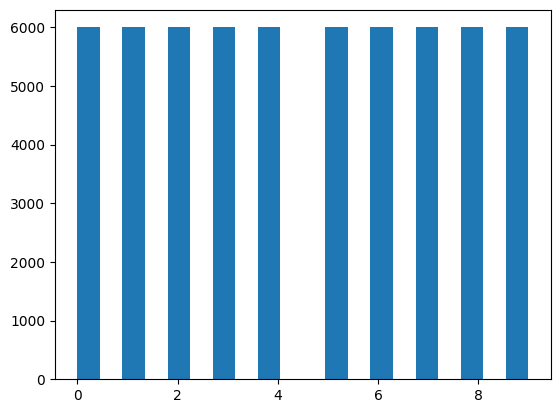

In [13]:
plt.hist(y_train,bins=20)

### 3. Dataset split:

Remember that we have already splitted entire dataset into training and test dataset. Now we further split training dataset into data for actual training dataset and validation dataset.

**Validation dataset** is the sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. Validation dataset is used to tune different hyperparameters so the model is unbiased. A model never learns from the validation dataset.

Also remember that the division of dataset was done into 2 parts while importing the dataset itself. Now we must use sklearn `train_test_split` api to further split the training dataset.

`sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)`

In [14]:
from sklearn import model_selection as ms

In [15]:
x_train,x_val,y_train,y_val= ms.train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [16]:
print(x_train.shape,y_train.shape)
print('\n')
print(x_val.shape,y_val.shape)

(48000, 28, 28) (48000,)


(12000, 28, 28) (12000,)


Here we manually specified the validation dataset to be 20% of the unsplitted training data.

The new subset of data are:
* Actual training data = 48000
* Validation data = 12000
* Test data = 10000

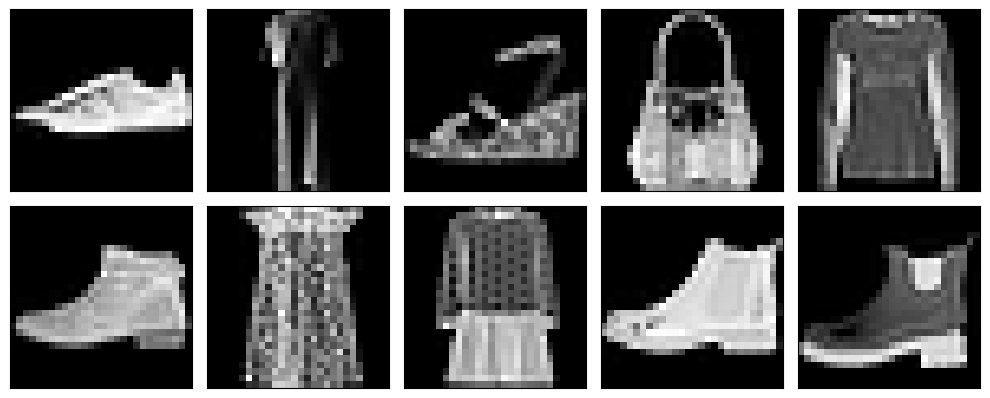

In [17]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, int(i + 1))
    plt.imshow(x_train[i], cmap='gray')
    plt.xticks([])  # removes the vertical lines (grid) in the pictures
    plt.yticks([])  # removes horizontal lines or ticks
plt.tight_layout()
plt.show()


### 4. Classification using Keras:

We will firstly implement the classification task using keras library. Before building the model, lets us reshape the train, test and validation dataset to make it compatible with the input layer of the model.

Here the 2d image is to be vectorized into 1d shape.
As 28 * 28 = 784, we will be converting the 28 * 28 matrix to a vector of dimension 1 * 784.

Lets check the logic behind the reshape method given in tensorflow.

`tf.reshape(tensor, shape, name=None)`



In [18]:
# sample example
t = [[1, 2, 3],
     [4, 5, 6]]
t

[[1, 2, 3], [4, 5, 6]]

In [19]:
tf.reshape(t, (-1))
t

[[1, 2, 3], [4, 5, 6]]

**Wait a moment!! Did it not work?**

The issue arose because TensorFlow's tf.reshape function does not modify the original tensor in place; instead, it returns a new tensor with the specified shape.

So lets try printing the reshaped tensor instead.

In [20]:
print(tf.reshape(t, [-1]))

tf.Tensor([1 2 3 4 5 6], shape=(6,), dtype=int32)


Hurray! So the takeaway is to store the reshaped tensor somewhere so we might use it later.

Now that we have learned the logic behind the reshape method in Tensorflow, lets reshape our dataset.

In [21]:
x_train=tf.reshape(x_train,(-1,784))
x_val=tf.reshape(x_val,(-1,784))
x_test=tf.reshape(x_test,(-1,784))

In [22]:
x_train.shape

TensorShape([48000, 784])

Lets move on to the real juice of this notebook. That is to do the classification task using Keras, Tensorflow.

### 4.a. Model Building:
Lets make a model with 3 hidden layers, 1 input layer and 1 output layers.

[*mnemonic = LA*]

During model building we do the following:
* **Layer** Addition  [L]
* **Activation function** description for each layers  [A]

In [23]:
input_size=784
output_size=10
hidden_1_shape=128
hidden_2_shape=64
hidden_3_shape=32

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Softmax

We must use softmax in the outer layer to predict the probabilities of prediciting each 10 classes (0 to 9). For the hidden layers, let's use softmax. You can experiment with different activation functions on your own.

In [25]:
# building model by stacking layers
model=Sequential([
                  Dense(hidden_1_shape,input_shape=(input_size,),activation="sigmoid"),

                  Dense(hidden_2_shape,activation="sigmoid"),

                  Dense(hidden_3_shape,activation="sigmoid"),

                  Dense(output_size),

                  Softmax()
])

Lets visualize the model we just built.

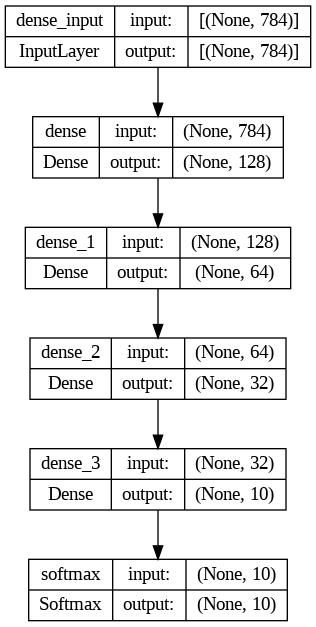

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Display the image
from IPython.display import Image
Image('model.png')

Alternatively, we can visualize the model as follows:

In [27]:
!pip install keras_sequential_ascii

from keras_sequential_ascii import keras2ascii
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####         784
               Dense   XXXXX -------------------    100480    90.4%
             sigmoid   #####         128
               Dense   XXXXX -------------------      8256     7.4%
             sigmoid   #####          64
               Dense   XXXXX -------------------      2080     1.9%
             sigmoid   #####          32
               Dense   XXXXX -------------------       330     0.3%
                       #####          10
             Softmax   ????? -------------------         0     0.0%
                       #####          10


### 4.b. Model Compiling

After defining the model, we compile the model where we do the following:

[*mnemonic = OLM*]

* **Optimizer** [O] = ADAM is a widely used optimizer that helps to obtain the optimum solution by adjusting the learning rate.
* **Loss function** [L] = Since this is the case of classification, we may use `categorical_crossentropy` or `sparse_categorical_crosssentropy`. But since there is no one-hot encoding used, we use sparse_categorical_crossentropy.
* **Metric** [M] = For a balanced dataset (each class has roughly same number of examples) like we have here, accuracy metric is enough to check the performance of the model.

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4.c Model training (Fitting):

After compiling the model, we do the **model fitting** and there are few things to remember while doing so. We include the following during the fitting:

[*mnemonic = XYBE*]

* X_train or the features  [X]
* y_train or the target labels [Y]
* Batch size [B]
* Epoch numbers [E]

Obviously there are more parameters than these for `fit()` method, but these are the most important parameters for you to remember.



#### Tensorboard specialization:

Before training the model, lets talk a little bit about Tensorboard. Tensorboard is a visualization toolkit that can be used to track and visualize metrics such as loss and accuracy over time, visualize your model architecture, show histograms of weights and biases, and more. The syntax is:

`tf.keras.callbacks.TensorBoard(log_dir='logs',histogram_freq=0,write_graph=True,write_images=False,write_steps_per_second=False,update_freq='epoch', profile_batch=0,embeddings_freq=0,embeddings_metadata=None)`
* log_dir: Directory where log files will be saved
* histogram_freq = 0: Histogram will be logged and saved every 0 epochs.

When you specify tf.keras.callbacks.TensorBoard('logs'), you're setting up TensorBoard to log the training and validation metrics, which can be later visualized in the TensorBoard dashboard.

In [30]:
callbacks = [tf.keras.callbacks.TensorBoard('logs')]

Lets fit (train) the model now.

In [31]:
history = model.fit(x_train,y_train,batch_size=128,
          validation_data=(x_val,y_val),epochs=200, callbacks = callbacks)

Epoch 1/200
375/375 [==============================] - 8s 8ms/step - loss: 1.3675 - accuracy: 0.5649 - val_loss: 0.9283 - val_accuracy: 0.6768
Epoch 2/200
375/375 [==============================] - 3s 9ms/step - loss: 0.8062 - accuracy: 0.7245 - val_loss: 0.7650 - val_accuracy: 0.7193
Epoch 3/200
375/375 [==============================] - 4s 11ms/step - loss: 0.7317 - accuracy: 0.7266 - val_loss: 0.7144 - val_accuracy: 0.7279
Epoch 4/200
375/375 [==============================] - 3s 8ms/step - loss: 0.6896 - accuracy: 0.7350 - val_loss: 0.6872 - val_accuracy: 0.7354
Epoch 5/200
375/375 [==============================] - 2s 6ms/step - loss: 0.6887 - accuracy: 0.7387 - val_loss: 0.7071 - val_accuracy: 0.7313
Epoch 6/200
375/375 [==============================] - 1s 4ms/step - loss: 0.6819 - accuracy: 0.7382 - val_loss: 0.7068 - val_accuracy: 0.7173
Epoch 7/200
375/375 [==============================] - 2s 4ms/step - loss: 0.6758 - accuracy: 0.7328 - val_loss: 0.7094 - val_accuracy: 0.714

### 4.d. Visualizing the Loss and Metric:

Remember that in model compiling we specified (OLM) Optimizers, Loss and Metric. Out of these, the log of the `Loss` and `Metric` are kept in TensorBoard, so these can be used to visualize the training.

In [32]:
print(history.history)
print(history.history['loss'])        # training loss
print(history.history['accuracy'])    # training accuracy

{'loss': [1.3674843311309814, 0.8062241077423096, 0.7316778302192688, 0.689554750919342, 0.6887198090553284, 0.6818565130233765, 0.6758151650428772, 0.6732373237609863, 0.6616248488426208, 0.6442729830741882, 0.6377868056297302, 0.628014862537384, 0.627524197101593, 0.6294998526573181, 0.6460540890693665, 0.6328036189079285, 0.6241843104362488, 0.6080814599990845, 0.603939950466156, 0.5939744114875793, 0.5831301808357239, 0.5934851765632629, 0.5896276235580444, 0.578519344329834, 0.601235032081604, 0.6100397109985352, 0.5897364616394043, 0.5735436081886292, 0.5887190699577332, 0.5993913412094116, 0.5722546577453613, 0.5717354416847229, 0.5760504603385925, 0.5802891254425049, 0.5813831090927124, 0.552420437335968, 0.5568927526473999, 0.5618360638618469, 0.5438384413719177, 0.548041820526123, 0.5424314141273499, 0.5558687448501587, 0.5591781139373779, 0.5471320152282715, 0.552364706993103, 0.5527579188346863, 0.5668007135391235, 0.5615834593772888, 0.5483614802360535, 0.5380954742431641,

In [33]:
print(history.history['val_loss'])          # validation loss
print(history.history['val_accuracy'])      # validation accuracy

[0.9283068180084229, 0.7650495767593384, 0.7143723964691162, 0.6871622204780579, 0.7070604562759399, 0.7067877650260925, 0.7094451785087585, 0.6920768022537231, 0.6474043726921082, 0.6320164799690247, 0.6364604830741882, 0.6481826901435852, 0.6587012410163879, 0.6459251642227173, 0.6809960603713989, 0.6505362391471863, 0.649336040019989, 0.6441397070884705, 0.6390499472618103, 0.6226633787155151, 0.5772058963775635, 0.6281296610832214, 0.6209761500358582, 0.6008157730102539, 0.628342866897583, 0.6368508338928223, 0.5987286567687988, 0.5913581252098083, 0.6182633638381958, 0.625640869140625, 0.5767544507980347, 0.6072233319282532, 0.584210216999054, 0.5945929884910583, 0.5848628282546997, 0.5645545721054077, 0.5949568748474121, 0.5677126049995422, 0.5837985277175903, 0.5856406092643738, 0.5682501792907715, 0.5877400040626526, 0.582341730594635, 0.5795938968658447, 0.5604609251022339, 0.5908454060554504, 0.5724387168884277, 0.564939022064209, 0.5587567687034607, 0.5562488436698914, 0.558

The log for the overall training loss is stored as loss. The validation loss is stored as "val_loss". So we can plot both the training and validation loss simultaneously on a single plot.

The Training involved:
* Forward propagation
* Loss and Metric (Accuracy) calculation
* Backpropagation (Aided by Optimizer)

(*Notice the presence of the mnemonic 'OLM' during the trainng. Remember we compiled the model with OLM.*)

The Validation procedure involved:
* Forward propagation
* Loss and Metric (Accuracy) calculation

(*Notice the absence of the mnemonic 'O' during valiadtion. It's so because Backpropagation (learning or training) doesn't happen in validation and testing phase.*)

Text(0, 0.5, 'Loss')

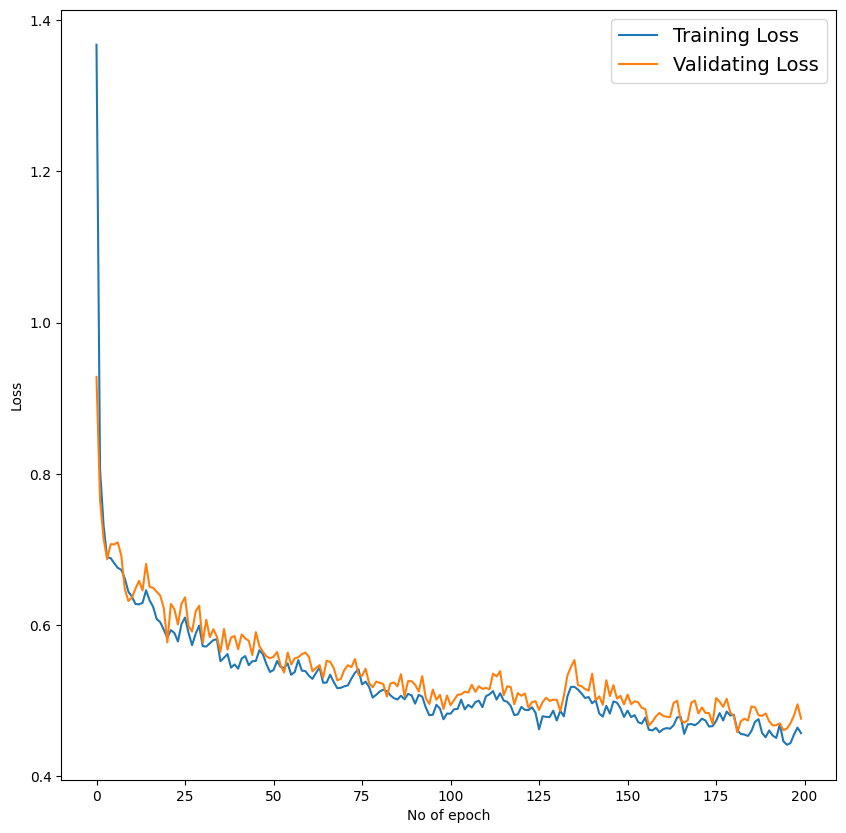

In [34]:
plt.figure(figsize=(10,10))

x = tf.range(0,200)
plt.plot(x,history.history['loss'], label='Training Loss')
plt.plot(x,history.history['val_loss'], label='Validating Loss')
plt.legend(loc='upper right',fontsize=14)

plt.xlabel('No of epoch')
plt.ylabel('Loss')

### 4.e. Testing the model on test data

Remember that we reshaped the 2d image to a vector? Now lets try to reshape it back to 2d matrix representation and store it under a different name.

In [36]:
# Get the number of samples
num_samples_train = x_train.shape[0]
num_samples_val = x_val.shape[0]
num_samples_test = x_test.shape[0]

print(num_samples_train)
print(num_samples_val)
print(num_samples_test)

48000
12000
10000


In [37]:
x_train_2d=tf.reshape(x_train,(48000,28,28))
x_val_2d=tf.reshape(x_val,(12000,28,28))
x_test_2d=tf.reshape(x_test,(10000,28,28))

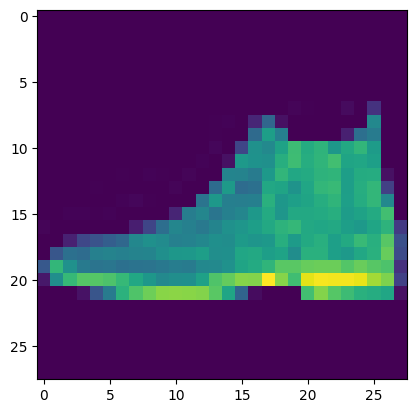

In [38]:
plt.imshow(x_test_2d[0,:,:])

Lets ask the model to predict the first instance of the x_test and see if it can correctly predict the label for the above image.

In [58]:
print(y_test[0])

9


Here the class label of the above image is '9'. Lets see if the model outputs '9'

In [59]:
# Predicting a single sample
sample = np.expand_dims(x_test[0], axis=0)
prediction = model.predict(sample)
print(prediction)

1/1 [==============================] - 0s 17ms/step
[[2.1408678e-06 1.6534470e-07 2.2636600e-08 4.9729119e-06 3.2635896e-08
  5.6802575e-03 1.9223219e-06 1.0280689e-02 2.2316237e-04 9.8380661e-01]]


The output received from the model's prediction is a probability distribution over the 10 classes. Each element in the array represents the model's confidence in each class. To determine the predicted class, you need to find the index of the maximum value in this array.

Clearly, from the observation, you can see that the output is 9, as it has the highest probability. However, machine learning models are often deployed in real-world applications, and the users of these applications may not have technical expertise. Therefore, it is important to present the results in a user-friendly manner.

To achieve this, we can programmatically determine the predicted class by finding the index with the highest probability using `np.argmax`. This ensures that the predicted class is clearly communicated to the user.

In [60]:
predicted_class = np.argmax(model.predict(sample))
print(predicted_class)

1/1 [==============================] - 0s 17ms/step
9


The model correctly identified the test instance.
Now instead of manually checking each and every instance, lets check for all the test instances and find the model's performace in terms of accuracy and overall loss.

In [61]:
loss,accuracy = model.evaluate(x=x_test, y=y_test, batch_size=128,verbose=2)

print('\nTest accuracy:', accuracy)

79/79 - 0s - loss: 0.4997 - accuracy: 0.8151 - 252ms/epoch - 3ms/step

Test accuracy: 0.8151000142097473


#### Conclusion/Insights:

The overall accuracy obtained from the model is not 100%, which is a common occurrence in machine learning projects. This is because achieving perfect accuracy is often a theoretical ideal rather than a practical expectation.

Several factors contribute to less than perfect accuracy:

  * **Model Complexity and Overfitting**: Striving for 100% training accuracy may lead to overfitting, where the model becomes overly complex and memorizes the training data instead of generalizing to new, unseen data. As a result, such a model may perform exceptionally well on the training data but poorly on the test data.

  * **Model Simplicity and Underfitting**: Conversely, if the model is too simple, it may underfit the data by oversimplifying the problem. An underfitted model performs poorly on both the training and test data because it fails to capture the underlying patterns in the data.

Also it is necessary to mention about other classification metrics besides accuracy, because the dataset may not be balanced. Plus, the other metrics provide some additional insights. Some other metrics are given below:


<figure>
<center>
<img src = "https://drive.google.com/uc?id=10MXqisH9WZIoyA4Gc5qiIOAIQjr1elMS" width="600" height="400">

Fig: Predicted vs Actual classification
</center>
</figure>


* TP = True Positive: Model predicts positive for actual positive (truly classsifies as positive)
* FP = False Positive: Model predicts positive for actual negative (falsely classifies as positive)
* FN = False Negative: Model predicts negative for actual positive (falsely classifies as negative)
* TN = True Negative: Model predicts negative for actual negative (truly classifies as negative)

\


Take the figure as shown. Based on the figure, let's write some metrics.

##### 1. $Accuracy = {Correct-prediction \over Total-samples}$
 * Tells you if the model classified samples correctly (combined accuracy for both classes, without differentiating about positive or negative class).
 * Problem arises due to the possibility of misclassification of minor class samples being very high.

##### 2. $Precision = {TP \over TP+FP}$
 * Tells you how many of the positive predictions made by the model are actually correct. (Think of it as an `accuracy for positive class`)
 * Used when making positive predictions correctly is important. (when **maximizing true positives** is important or minimizing false positives is important.)
 * Example: In sentencing a suspect to a prison, you may want to be highly correct about the decision because falsely incarcenating someone has a very very high cost; it is always better to leave out 100 criminals than to falsely accuse 1 innocent person.

##### 3. $Recall (Sensitivity) (TPR) = {TP \over TP+FN}$
 * Tells you how much of the actual positive instances are correctly identified by the model. (Think of it as the model's `confidence in saying positive` when it's actually positive)
 * Suitable when identifying as many positive samples as possible is important. (or minimizing false negatives is important).
 * Example: In disease diagnostics, you may want to find all the risks even though some may be falsely predicted. Becasue even if the model identifed a healthy person as a risk, at least the person can go to actual doctor and be aware. But if a potential risky patient is not identified, the cost may be higher.

##### 4. $Specificity(TNR) = {TN \over FP+TN}$
 * Tells you how much actual negative instances are correctly identified by the model. (Think of it as the model's `confidence in saying negative` when it's actually negative.)
 * Suitable when identifying negative items are important.
 * Example: Refer to example given in Precision. (We want to be able to **maximize true negatives** so that we can classify innocent people as innocent. This doesn't ensure lower false incarcenation (lower False positives) but at least gives us confidence that model is highly good and specific at detecting the innocents.

##### 5. $FPR = {FP \over FP + TN}$
 * Tells you how much actual negatives are falsely identified by the model.
 (Think of it as the model's `inaccuracy in saying negative` when it's negative.
 * Suitable to find and **minimize false positives** them.
 * Example: Exactly the same as the example given in Precision. ( In Precision we focused on maximizing true positives, here we focus on minimizing false positives. It's the same thing.)

\

**Note that FPR and TPR can be used to plot AUC curve.**
 * FPR is in x-axis, TPR(sensitivity) is in y-axis.
 * If the area under the curve is high, the model is better at detecting True Positives (sensitive) and minimizing False positives.

\

##### 6. $F1 Score = {2 (Precision * Recall) \over Precision + Recall}$
 * Maximizes both Precision and Recall independently:

  * If precision is low, model's accuracy is low for positive class and that there are a lot of FP, thus increasing FPR.(Remember precision means how accurate the model is in classifying positive class.)

  * If recall is low, model is leaving out large samples and not confident enough in saying that the samples are positive when they actually are (thus the model may predict actual positives as negatives, thus increasing FNR.)

* Unlike the arithmetic mean, harmonic mean gives more weight to lower values. Thus if either of recall or precision is low, the F1 Score is going to be low.
 * Think of arithmetic mean as an OR gate in logic gates: If either value is high, the mean is going to be high.
 * Think of Harmonic mean as an AND gate: If either of the two is low, the mean will be low.

This concludes the purpose of this notebook. Here, you learned how to utilize Keras, TensorFlow to build your ANN model and perform a simple classification for 10 classes. You also became familiar with the various classification metrics.